<a href="https://colab.research.google.com/github/sezaionurlu/Customer-Segmentation-with-RFM-Analysis/blob/main/RFM_Analizi_ile_M%C3%BC%C5%9Fteri_Segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################################
# RFM Analizi ile Müşteri Segmentasyonu
##############################################################

**İş Problemi**

Online ayakkabı mağazası olan FLO müşterilerini
segmentlere ayırıp bu segmentlere göre pazarlama
stratejileri belirlemek istiyor. Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.


**Veri Seti Hikayesi**

Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

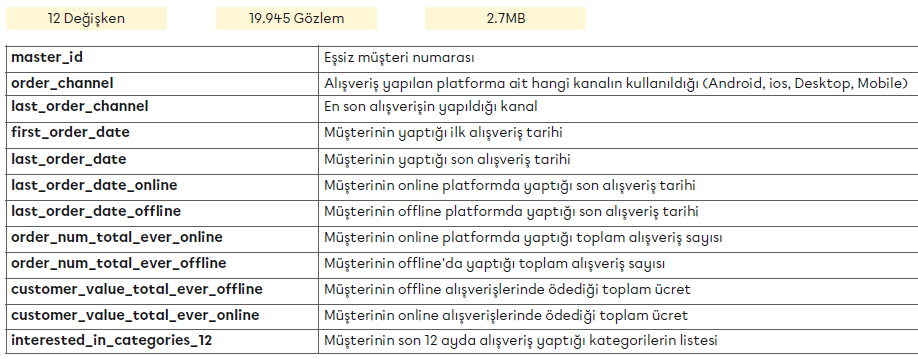

**Proje Görevleri**

In [ ]:
!pip install lifetimes
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 13.7 MB/s 


*Görev 1: Veriyi Anlama ve Hazırlama*

In [ ]:
# Adım1: flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/3/flo_data_20k.csv')

In [ ]:
df = df_.copy()

In [ ]:
# Adım2: Veri setinde
# a. İlk 10 gözlem,
# b. Değişken isimleri,
# c. Betimsel istatistik,
# d. Boş değer,
# e. Değişken tipleri, incelemesi yapınız.

In [ ]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [ ]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [ ]:
df.shape

(19945, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [ ]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
df.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

In [ ]:
# Adım3: Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
# alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [ ]:
df['order_num_total_ever'] = df['order_num_total_ever_offline'] + df['order_num_total_ever_online']

In [ ]:
df['customer_value_total_ever'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [ ]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever,customer_value_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [ ]:
# Adım4: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
for col in df.loc[:,df.columns.str.contains('date')]:
    df[col] = df[col].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
# Adım5: Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

In [ ]:
df.groupby('order_channel').agg({'master_id': 'count',
                         'order_num_total_ever': 'count',
                         'customer_value_total_ever': 'count'})

,master_id,order_num_total_ever,customer_value_total_ever
order_channel,,,
Android App,9495,9495,9495
Desktop,2735,2735,2735
Ios App,2833,2833,2833
Mobile,4882,4882,4882


In [ ]:
# Adım6: En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.

In [ ]:
df.groupby('master_id').agg({'customer_value_total_ever':'sum'}).sort_values('customer_value_total_ever', ascending=False).head(10)

,customer_value_total_ever
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.1000
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.2900
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.1000
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.4100
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.3400
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.5700
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.5700
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.1000
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.2400


In [ ]:
# master_id' ler unique

df[['master_id','customer_value_total_ever']].sort_values('customer_value_total_ever', ascending=False).head(10)

,master_id,customer_value_total_ever
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.1000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.2900
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.1000
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.4100
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.3400
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.5700
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.5700
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.1000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.2400
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.1500


In [ ]:
# Adım7: En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

In [ ]:
df.groupby('master_id').agg({'order_num_total_ever':'sum'}).sort_values('order_num_total_ever', ascending=False).head(10)

,order_num_total_ever
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0000
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0000
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0000
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0000
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0000
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0000
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0000
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0000
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0000


In [ ]:
# Adım8: Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [ ]:
?df.astype()

In [ ]:
def veri_on_haz(dataframe):
  dataframe['order_num_total_ever'] = dataframe['order_num_total_ever_offline'] + dataframe['order_num_total_ever_online']
  dataframe['customer_value_total_ever'] = dataframe['customer_value_total_ever_offline'] + dataframe['customer_value_total_ever_online']
  for col in dataframe.loc[:,df.columns.str.contains('date')]:
    df[col] = df[col].astype('datetime64')

In [ ]:
df = df_.copy()

In [ ]:
veri_on_haz(df)

In [ ]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever,customer_value_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

*Görev 2: RFM Metriklerinin Hesaplanması*

NOT: recency değerini hesaplamak için analiz tarihini maksimum tarihten 2 gün sonrası seçebilirsiniz

In [ ]:
# Adım 1: Recency, Frequency ve Monetary tanımlarını yapınız.

In [ ]:
# Recency: Analizin yapıldığı tarihle son satın alma arasıdaki fark
# Frequency: Kaç defa satın alma yaptığı
# Monetary: Toplam getirisi

In [ ]:
# Adım 2: Müşteri özelinde Recency, Frequency ve Monetary metriklerini hesaplayınız.

In [ ]:
df['last_order_date'].max()

Timestamp('2021-05-30 00:00:00')

In [ ]:
today_date = dt.datetime(2021,6 ,1 )

In [ ]:
df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date-last_order_date.max()).days,
                             'order_num_total_ever': 'sum',
                             'customer_value_total_ever': 'sum'})

,last_order_date,order_num_total_ever,customer_value_total_ever
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300
...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0000,796.8700
fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0000,318.8700
fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0000,983.9200


In [ ]:
# Adım 3: Hesapladığınız metrikleri rfm isimli bir değişkene atayınız.

In [ ]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date-last_order_date.max()).days,
                             'order_num_total_ever': 'sum',
                             'customer_value_total_ever': 'sum'})

In [ ]:
# Adım 4: Oluşturduğunuz metriklerin isimlerini recency, frequency ve monetary olarak değiştiriniz.

In [ ]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [ ]:
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300


*Görev 3: RF Skorunun Hesaplanması*

In [ ]:
# Adım 1: Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

In [ ]:
pd.qcut(rfm['recency'], 5, labels = [5, 4, 3, 2, 1])
pd.qcut(rfm['frequency'].rank(method='first'), 5, labels = [1, 2 ,3 ,4 ,5])
pd.qcut(rfm['monetary'], 5, labels = [1, 2 ,3 ,4 ,5])

master_id
00016786-2f5a-11ea-bb80-000d3a38a36f    4
00034aaa-a838-11e9-a2fc-000d3a38a36f    1
000be838-85df-11ea-a90b-000d3a38a36f    4
000c1fe2-a8b7-11ea-8479-000d3a38a36f    4
000f5e3e-9dde-11ea-80cd-000d3a38a36f    5
                                       ..
fff1db94-afd9-11ea-b736-000d3a38a36f    4
fff4736a-60a4-11ea-8dd8-000d3a38a36f    2
fffacd34-ae14-11e9-a2fc-000d3a38a36f    4
fffacecc-ddc3-11e9-a848-000d3a38a36f    5
fffe4b30-18e0-11ea-9213-000d3a38a36f    3
Name: monetary, Length: 19945, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
# Adım 2: Bu skorları recency_score, frequency_score ve monetary_score olarak kaydediniz.

In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels = [5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels = [1, 2 ,3 ,4 ,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels = [1, 2 ,3 ,4 ,5])

In [ ]:
# Adım 3: recency_score ve frequency_score’u tek bir değişken olarak ifade ediniz ve RF_SCORE olarak kaydediniz.

In [ ]:
rfm['RF_SCORE'] =  (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,4,5,54


*Görev 4: RF Skorunun Segment Olarak Tanımlanması*

In [ ]:
# Adım 1: Oluşturulan RF skorları için segment tanımlamaları yapınız.

In [ ]:
# Adım 2: Aşağıdaki seg_map yardımı ile skorları segmentlere çeviriniz.

In [ ]:
seg_map = {
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at_Risk',
    r'[1-2]5':'cant_loose',
    r'3[1-2]':'about_to_sleep',
    r'33':'need_attention',
    r'[3-4][4-5]':'loyal_customers',
    r'41':'promising',
    r'51':'new_customers',
    r'[4-5][2-3]':'potential_loyalists',
    r'5[4-5]':'champions',
}

In [ ]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,4,5,54,champions


*Görev 5: Aksiyon Zamanı !*

In [ ]:
# Adım1: Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [ ]:
rfm.groupby('segment').agg({'recency':'mean',
                            'frequency':'mean',
                            'monetary': 'mean'})

,recency,frequency,monetary
segment,,,
about_to_sleep,114.0316,2.4066,361.6494
at_Risk,242.3290,4.4702,648.3250
cant_loose,235.1591,10.7169,1481.6524
champions,17.1422,8.9651,1410.7089
hibernating,247.4263,2.3915,362.5833
loyal_customers,82.5579,8.3564,1216.2572
need_attention,113.0372,3.7395,553.4366
new_customers,17.9762,2.0000,344.0495
potential_loyalists,36.8697,3.3108,533.7413


In [ ]:
# Adım2: RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.

a. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri
tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak
iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş
yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

b. Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte
iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni
gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [ ]:
# a

In [ ]:
rfm.reset_index()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,3,4,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,4,5,54,champions
...,...,...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0000,796.8700,2,4,4,24,at_Risk
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0000,318.8700,4,2,2,42,potential_loyalists
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0000,983.9200,1,4,4,14,at_Risk
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,132,9.0000,1362.2000,3,5,5,35,loyal_customers


In [ ]:
rfm_final = rfm.merge(df, on = 'master_id', how='left')

In [ ]:
rfm_final = rfm_final[['master_id','segment','interested_in_categories_12']]

In [ ]:
rfm_final.head()

,master_id,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,champions,"[ERKEK, AKTIFSPOR]"


In [ ]:
rfm_final.loc[(rfm_final['segment'].isin(['champions', 'loyal_customers'])) & (rfm_final['interested_in_categories_12'].str.contains('KADIN')),:]

,master_id,segment,interested_in_categories_12
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
18,003903e0-abce-11e9-a2fc-000d3a38a36f,loyal_customers,[KADIN]
22,004bec18-9f7a-11e9-a2fc-000d3a38a36f,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
25,00534fe4-a6b4-11e9-a2fc-000d3a38a36f,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
49,009293fe-1f3e-11ea-87bf-000d3a38a36f,loyal_customers,"[COCUK, KADIN, AKTIFSPOR]"
...,...,...,...
19931,ffd73136-b098-11e9-9757-000d3a38a36f,loyal_customers,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
19932,ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f,champions,"[COCUK, KADIN]"
19936,ffe5c7e8-ee12-11e9-9346-000d3a38a36f,loyal_customers,"[ERKEK, KADIN]"
19939,ffefdd18-77ca-11ea-9b70-000d3a38a36f,loyal_customers,"[COCUK, KADIN]"


In [ ]:
rfm_a = rfm_final.loc[(rfm_final['segment'].isin(['champions', 'loyal_customers'])) & (rfm_final['interested_in_categories_12'].str.contains('KADIN')),:]

In [ ]:
rfm_a.to_csv('adim2_a')

In [ ]:
# b

In [ ]:
rfm_final.head()

,master_id,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,champions,"[ERKEK, AKTIFSPOR]"


In [ ]:
rfm_final.loc[(rfm_final['segment'].isin(['new_customers', 'hibernating', 'cant_loose'])) 
            & (rfm_final['interested_in_categories_12'].str.contains('COCUK') | rfm_final['interested_in_categories_12'].str.contains('ERKEK')),:]

,master_id,segment,interested_in_categories_12
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
11,00263f1a-210a-11ea-b50a-000d3a38a36f,hibernating,[ERKEK]
16,0033f078-7359-11ea-92d0-000d3a38a36f,hibernating,[ERKEK]
34,006bb20e-a9a8-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, AKTIFSPOR]"
40,007cdfe4-1f54-11ea-87bf-000d3a38a36f,cant_loose,[ERKEK]
...,...,...,...
19892,ff44ba3a-1372-11ea-a001-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
19907,ff839e5e-1fdd-11ea-87bf-000d3a38a36f,hibernating,[ERKEK]
19922,ffc47e38-003d-11eb-8341-000d3a38a36f,hibernating,"[AKTIFCOCUK, AKTIFSPOR]"
19929,ffd1553a-1ed0-11ea-81ff-000d3a38a36f,hibernating,[ERKEK]


In [ ]:
rfm_final.loc[(rfm_final['segment'].isin(['new_customers', 'hibernating', 'cant_loose'])) 
            & (rfm_final['interested_in_categories_12'].str.contains('COCUK|ERKEK')),:]

,master_id,segment,interested_in_categories_12
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
11,00263f1a-210a-11ea-b50a-000d3a38a36f,hibernating,[ERKEK]
16,0033f078-7359-11ea-92d0-000d3a38a36f,hibernating,[ERKEK]
34,006bb20e-a9a8-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, AKTIFSPOR]"
40,007cdfe4-1f54-11ea-87bf-000d3a38a36f,cant_loose,[ERKEK]
...,...,...,...
19892,ff44ba3a-1372-11ea-a001-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
19907,ff839e5e-1fdd-11ea-87bf-000d3a38a36f,hibernating,[ERKEK]
19922,ffc47e38-003d-11eb-8341-000d3a38a36f,hibernating,"[AKTIFCOCUK, AKTIFSPOR]"
19929,ffd1553a-1ed0-11ea-81ff-000d3a38a36f,hibernating,[ERKEK]


In [ ]:
rfm_b = rfm_final.loc[(rfm_final['segment'].isin(['new_customers', 'hibernating', 'cant_loose'])) 
            & (rfm_final['interested_in_categories_12'].str.contains('COCUK|ERKEK')),:]

In [ ]:
rfm_b.to_csv('adim2_b')

In [ ]:
x = rfm_final.loc[(rfm_final['segment'].isin(['new_customers', 'hibernating', 'cant_loose'])) 
            & (rfm_final['interested_in_categories_12'].str.contains('COCUK|ERKEK')),:]

In [ ]:
x

,master_id,segment,interested_in_categories_12
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
11,00263f1a-210a-11ea-b50a-000d3a38a36f,hibernating,[ERKEK]
16,0033f078-7359-11ea-92d0-000d3a38a36f,hibernating,[ERKEK]
34,006bb20e-a9a8-11e9-a2fc-000d3a38a36f,hibernating,"[ERKEK, AKTIFSPOR]"
40,007cdfe4-1f54-11ea-87bf-000d3a38a36f,cant_loose,[ERKEK]
...,...,...,...
19892,ff44ba3a-1372-11ea-a001-000d3a38a36f,hibernating,"[ERKEK, KADIN]"
19907,ff839e5e-1fdd-11ea-87bf-000d3a38a36f,hibernating,[ERKEK]
19922,ffc47e38-003d-11eb-8341-000d3a38a36f,hibernating,"[AKTIFCOCUK, AKTIFSPOR]"
19929,ffd1553a-1ed0-11ea-81ff-000d3a38a36f,hibernating,[ERKEK]


In [ ]:
x['segment'].value_counts()

hibernating      1785
cant_loose        814
new_customers     171
Name: segment, dtype: int64

In [ ]:
x['interested_in_categories_12'].value_counts()

[ERKEK]                                         740
[ERKEK, AKTIFSPOR]                              284
[ERKEK, KADIN]                                  266
[COCUK]                                         245
[AKTIFCOCUK]                                    199
[ERKEK, KADIN, AKTIFSPOR]                       154
[COCUK, KADIN]                                  127
[AKTIFCOCUK, COCUK]                              84
[COCUK, AKTIFSPOR]                               69
[AKTIFCOCUK, AKTIFSPOR]                          66
[ERKEK, COCUK]                                   48
[ERKEK, COCUK, KADIN]                            44
[AKTIFCOCUK, COCUK, KADIN]                       41
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 41
[COCUK, KADIN, AKTIFSPOR]                        37
[AKTIFCOCUK, KADIN]                              37
[AKTIFCOCUK, COCUK, AKTIFSPOR]                   32
[AKTIFCOCUK, KADIN, AKTIFSPOR]                   30
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]            29
[AKTIFCOCUK,